# Домашняя работа "Оценка точности модели, переобучение, регуляризация"
Задание:
Посчитать tpr и fpr в ноутбуке к лекции.

Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

Построить график Precision - Recall на этих же данных.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('C:/Users/User/Desktop/ФГУП НТЦ РХБГ 2022/Другое/Data Science 2022/HW/Python/ML/HW3/HW/affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [5]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [6]:
X = data[data.columns[:-1]]
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [7]:
Y = data['affair']

In [8]:
model = LogisticRegression()

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
model.fit(X_train, Y_train)

LogisticRegression()

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [12]:
predictions = model.predict_proba(X_test)

In [15]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1])
fpr, tpr, thres

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.67459708e-04,
        7.67459708e-04, 3.06983883e-03, 3.06983883e-03, 3.83729854e-03,
        3.83729854e-03, 4.60475825e-03, 4.60475825e-03, 5.37221796e-03,
        5.37221796e-03, 6.13967767e-03, 6.13967767e-03, 6.90713738e-03,
        6.90713738e-03, 7.67459708e-03, 7.67459708e-03, 8.44205679e-03,
        8.44205679e-03, 9.20951650e-03, 9.20951650e-03, 9.97697621e-03,
        9.97697621e-03, 1.15118956e-02, 1.15118956e-02, 1.22793553e-02,
        1.22793553e-02, 1.38142748e-02, 1.38142748e-02, 1.45817345e-02,
        1.45817345e-02, 1.53491942e-02, 1.53491942e-02, 1.68841136e-02,
        1.68841136e-02, 1.76515733e-02, 1.76515733e-02, 1.91864927e-02,
        1.91864927e-02, 1.91864927e-02, 1.91864927e-02, 1.99539524e-02,
        1.99539524e-02, 2.07214121e-02, 2.07214121e-02, 2.14888718e-02,
        2.14888718e-02, 2.22563315e-02, 2.22563315e-02, 2.30237913e-02,
        2.30237913e-02, 2.37912510e-02, 2.37912510e-02, 2.455871

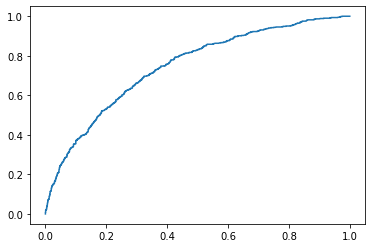

In [16]:
plt.plot( fpr, tpr )

In [19]:
roc_auc_score(Y_test, predictions[:, 1])

0.7451629176618145

In [20]:
tpr2 = [] 
fpr2 = [] 
precision = [] 
recall = [] 

for step in np.arange(0, 1, 0.001):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    
    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
        if predicted_prob > step:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1

    tpr_new = tp / (tp+fn)
    fpr_new = fp / (fp+tn)
    
    tpr2.append(tpr_new)
    fpr2.append(fpr_new)
    
    if tp != 0 and fp != 0:
        pr = tp / (tp+fp)
        rc = tp / (tp+fn)
        
        precision.append(pr)
        recall.append(rc)

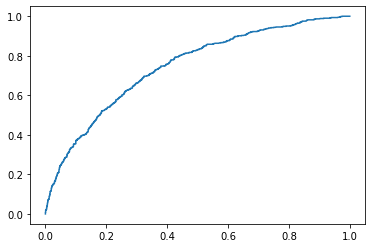

In [24]:
plt.plot( fpr, tpr )

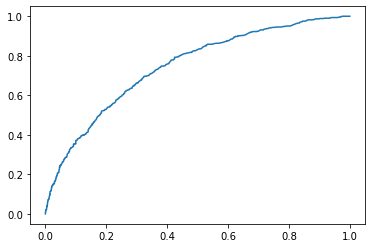

In [23]:
plt.plot( fpr2, tpr2 )

Графики одинаковы

In [25]:
from sklearn.metrics import precision_recall_curve

In [28]:
pr, rc, thres = precision_recall_curve(Y_test, predictions[:, 1])

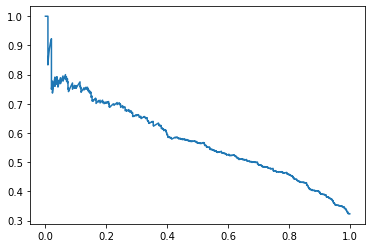

In [29]:
plt.plot( rc, pr )

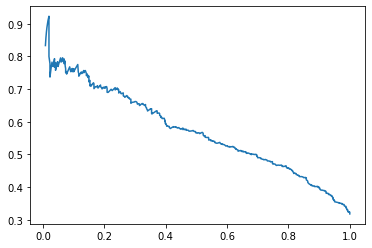

In [30]:
plt.plot( recall, precision )

Графики также одинаковы